# Plots of used bandwidth

This notebook will generate the box plots for how much bandwidth the clients in scenario 1, 8, 9, 10 and 11. used. This is to get insights into how much bandwidth were available during the successful calls.

The data is build from data gathered in the notebooks [BandwidthDataExtractionReceive](./BandwidthDataExtractionReceive.ipynb) and [BandwidthDataExtractionTransmit](./BandwidthDataExtractionTransmit.ipynb) which produces the files `SuccessfulCallsUsedReceiveBandwidth.csv` and `SuccessfulCallsUsedTransmitBandwidth.csv` that contains the mean of the bandwidth used during each call. The headers in each file is `scenario, roomId, client, bps` where bps is the mean of the bits / second measured for the given call (Measured on the host every 15 seconds).

Outputs the following:

- Box plot, Bandwidth used (Receive) [BoxPlotUsedBandwidthReceive.png](./output_folder/BoxPlotUsedBandwidthReceive.png)
- Box plot, Bandwidth used (Receive) [BoxPlotUsedBandwidthReceive.svg](./output_folder/BoxPlotUsedBandwidthReceive.svg)
- Box plot, Bandwidth used (Transmit) [BoxPlotUsedBandwidthTransmit.png](./output_folder/BoxPlotUsedBandwidthTransmit.png)
- Box plot, Bandwidth used (Transmit) [BoxPlotUsedBandwidthTransmit.svg](./output_folder/BoxPlotUsedBandwidthTransmit.svg)
- Box plot, Bandwidth used [BoxPlotUsedBandwidth.png](./output_folder/BoxPlotUsedBandwidth.png)
- Box plot, Bandwidth used [BoxPlotUsedBandwidth.svg](./output_folder/BoxPlotUsedBandwidth.svg)
- Box plot, Bandwidth used with threshold values [BoxPlotUsedBandwidthWithThreshold.png](./output_folder/BoxPlotUsedBandwidthWithThreshold.png)
- Box plot, Bandwidth used with threshold values [BoxPlotUsedBandwidthWithThreshold.svg](./output_folder/BoxPlotUsedBandwidthWithThreshold.svg)

In [1]:
import sys
from datetime import datetime, timedelta
from pymongo import MongoClient
import pandas as pd
import os
import json
import logging
import matplotlib.pyplot as plt
import helperFunctions as hf
import numpy as np
import requests

hf.setup()

outputFolder = "output_folder/"

if not os.path.exists(outputFolder):

   # Create a new directory because it does not exist
   os.makedirs(outputFolder)
   logging.info(f"The directory \"{outputFolder}\" is created!")

receiveFile = outputFolder + "SuccessfulCallsUsedReceiveBandwidth.csv"
transmitFile = outputFolder + "SuccessfulCallsUsedTransmitBandwidth.csv"

In [2]:
receiveDf = pd.read_csv(receiveFile)
transmitDf = pd.read_csv(transmitFile)

logging.info(f"Loaded {len(receiveDf)} rows from {receiveFile}")
logging.info(f"Loaded {len(transmitDf)} rows from {transmitFile}")

dataReceiveAlice = []
dataReceiveBob = []
dataTransmitAlice = []
dataTransmitBob = []

for scenario in receiveDf["scenario"].unique():
  s = hf.scenarios[scenario - 1]["scenario"]
  a = hf.scenarios[scenario - 1]["alice"]
  b = hf.scenarios[scenario - 1]["bob"]

  logging.info(f"Scenario: {s}, Alice: {a}, Bob: {b}")

  dataReceiveAlice.append(receiveDf.loc[(receiveDf["scenario"] == scenario) & (receiveDf["client"] == a)]["bps"].values / 1000)
  dataTransmitAlice.append(transmitDf.loc[(transmitDf["scenario"] == scenario) & (transmitDf["client"] == a)]["bps"].values / 1000)

  dataReceiveBob.append(receiveDf.loc[(receiveDf["scenario"] == scenario) & (receiveDf["client"] == b)]["bps"].values / 1000)
  dataTransmitBob.append(transmitDf.loc[(transmitDf["scenario"] == scenario) & (transmitDf["client"] == b)]["bps"].values / 1000)

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

colorAliceTransmit = "#1984c5"
colorAliceReceive = "#c23728"
colorBobTransmit = "#03fc0f"
colorBobReceive = "#fc9803"

2023-02-14 16:03:32 INFO     Loaded 4518 rows from output_folder/SuccessfulCallsUsedReceiveBandwidth.csv 
2023-02-14 16:03:32 INFO     Loaded 4518 rows from output_folder/SuccessfulCallsUsedTransmitBandwidth.csv 
2023-02-14 16:03:32 INFO     Scenario: 1, Alice: c1-Normal, Bob: d1-Normal 
2023-02-14 16:03:32 INFO     Scenario: 8, Alice: c1-Normal, Bob: d3-TorEurope 
2023-02-14 16:03:32 INFO     Scenario: 9, Alice: c3-TorEurope, Bob: d1-Normal 
2023-02-14 16:03:32 INFO     Scenario: 10, Alice: c1-Normal, Bob: d4-TorScandinavia 
2023-02-14 16:03:32 INFO     Scenario: 11, Alice: c4-TorScandinavia, Bob: d1-Normal 


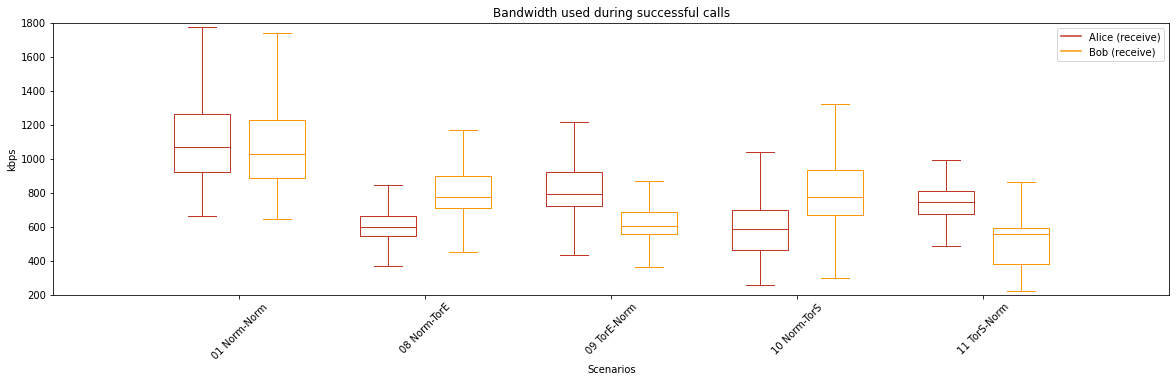

In [7]:

plt.figure()

bpReceiveAlice = plt.boxplot(dataReceiveAlice, positions=np.array(range(len(dataReceiveAlice)))*2.0-0.4, sym='', widths=0.6)
bpReceiveBob = plt.boxplot(dataReceiveBob, positions=np.array(range(len(dataReceiveBob)))*2.0+0.4, sym='', widths=0.6)

set_box_color(bpReceiveAlice, colorAliceReceive) # colors are from http://colorbrewer2.org/
set_box_color(bpReceiveBob, colorBobReceive)

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c=colorAliceReceive, label='Alice (receive)')
plt.plot([], c=colorBobReceive, label='Bob (receive)')

plt.legend()
plt.title("Bandwidth used during successful calls")
plt.rcParams["figure.figsize"] = [20,5]

plt.xlabel('Scenarios')
ticks = hf.getScenarioLabels(receiveDf["scenario"].unique())
plt.xticks(range(0, len(ticks) * 2, 2), ticks, rotation=45)
plt.xlim(-2, len(ticks)*2)

plt.ylim(200, 1800)
plt.ylabel('kbps')


plt.savefig("output_folder/BoxPlotUsedBandwidthReceive.png", format="png", bbox_inches='tight', transparent=False, dpi=600, pad_inches=0.1, facecolor='w', edgecolor='w')
plt.savefig("output_folder/BoxPlotUsedBandwidthReceive.svg", format="svg", bbox_inches='tight', transparent=False, dpi=600, pad_inches=0.1, facecolor='w', edgecolor='w')
plt.show()

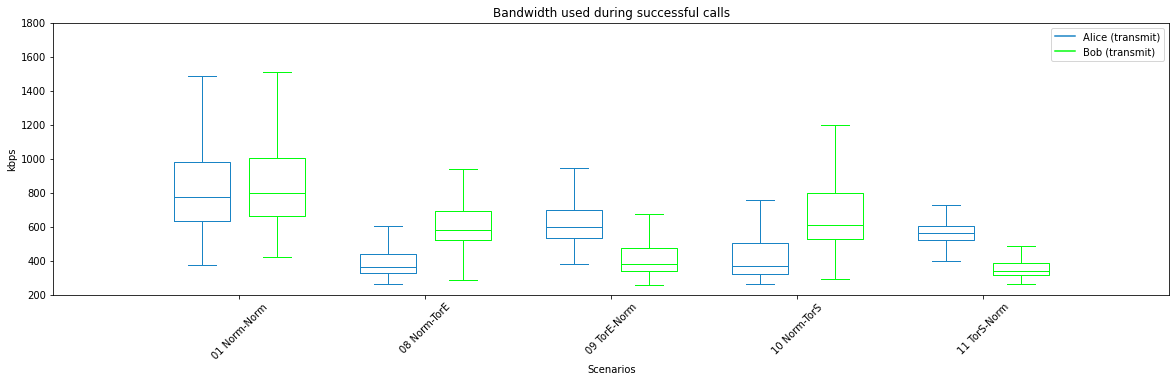

In [4]:
plt.figure()

bpTransmitAlice = plt.boxplot(dataTransmitAlice, positions=np.array(range(len(dataTransmitAlice)))*2.0-0.4, sym='', widths=0.6)
bpTransmitBob = plt.boxplot(dataTransmitBob, positions=np.array(range(len(dataTransmitBob)))*2.0+0.4, sym='', widths=0.6)

set_box_color(bpTransmitAlice, colorAliceTransmit) # colors are from http://colorbrewer2.org/
set_box_color(bpTransmitBob, colorBobTransmit)

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c=colorAliceTransmit, label='Alice (transmit)')
plt.plot([], c=colorBobTransmit, label='Bob (transmit)')

plt.legend()
plt.title("Bandwidth used during successful calls")
plt.rcParams["figure.figsize"] = [20,5]

plt.xlabel('Scenarios')
ticks = hf.getScenarioLabels(transmitDf["scenario"].unique())
plt.xticks(range(0, len(ticks) * 2, 2), ticks, rotation=45)
plt.xlim(-2, len(ticks)*2)

plt.ylim(200, 1800)
plt.ylabel('kbps')


plt.savefig("output_folder/BoxPlotUsedBandwidthTransmit.png", format="png", bbox_inches='tight', transparent=False, dpi=600, pad_inches=0.1, facecolor='w', edgecolor='w')
plt.savefig("output_folder/BoxPlotUsedBandwidthTransmit.svg", format="svg", bbox_inches='tight', transparent=False, dpi=600, pad_inches=0.1, facecolor='w', edgecolor='w')
plt.show()

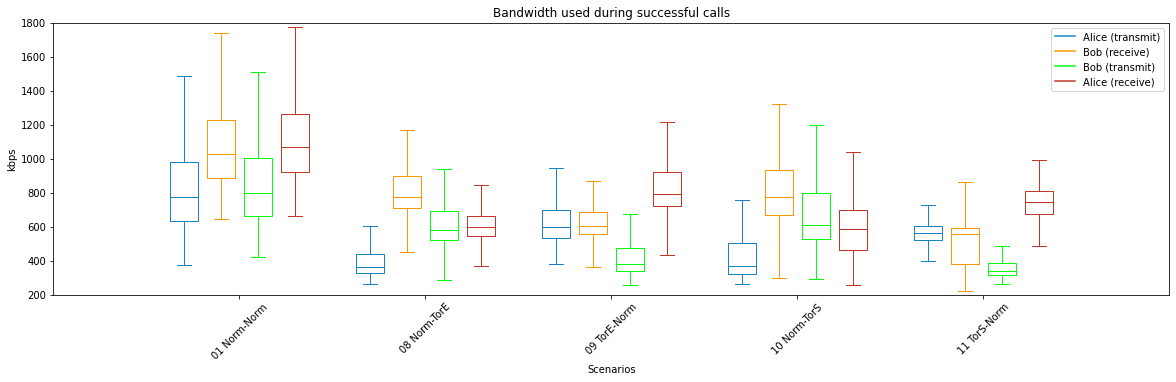

In [5]:
plt.figure()

bpTransmitAlice = plt.boxplot(dataTransmitAlice, positions=np.array(range(len(dataTransmitAlice)))*2.0-0.6, sym='', widths=0.3)
bpReceiveBob = plt.boxplot(dataReceiveBob, positions=np.array(range(len(dataReceiveBob)))*2.0-0.2, sym='', widths=0.3)
bpTransmitBob = plt.boxplot(dataTransmitBob, positions=np.array(range(len(dataTransmitBob)))*2.0+0.2, sym='', widths=0.3)
bpReceiveAlice = plt.boxplot(dataReceiveAlice, positions=np.array(range(len(dataReceiveAlice)))*2.0+0.6, sym='', widths=0.3)

set_box_color(bpTransmitAlice, colorAliceTransmit)
set_box_color(bpReceiveBob, colorBobReceive)
set_box_color(bpTransmitBob, colorBobTransmit)
set_box_color(bpReceiveAlice, colorAliceReceive) # colors are from http://colorbrewer2.org/

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c=colorAliceTransmit, label='Alice (transmit)')
plt.plot([], c=colorBobReceive, label='Bob (receive)')
plt.plot([], c=colorBobTransmit, label='Bob (transmit)')
plt.plot([], c=colorAliceReceive, label='Alice (receive)')

plt.legend()
plt.title("Bandwidth used during successful calls")
plt.rcParams["figure.figsize"] = [20,5]

plt.xlabel('Scenarios')
ticks = hf.getScenarioLabels(receiveDf["scenario"].unique())
plt.xticks(range(0, len(ticks) * 2, 2), ticks, rotation=45)
plt.xlim(-2, len(ticks)*2)

plt.ylim(200, 1800)
plt.ylabel('kbps')


plt.savefig("output_folder/BoxPlotUsedBandwidth.png", format="png", bbox_inches='tight', transparent=False, dpi=600, pad_inches=0.1, facecolor='w', edgecolor='w')
plt.savefig("output_folder/BoxPlotUsedBandwidth.svg", format="svg", bbox_inches='tight', transparent=False, dpi=600, pad_inches=0.1, facecolor='w', edgecolor='w')
plt.show()

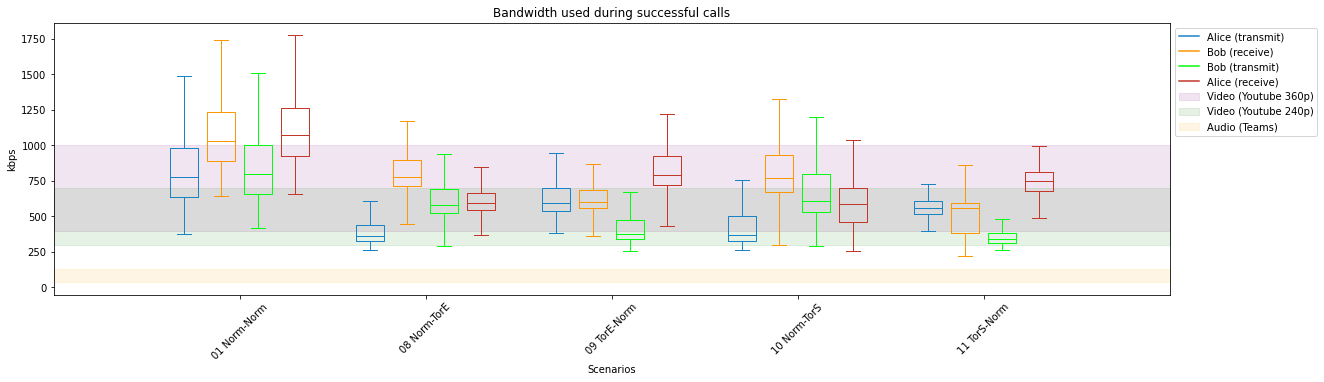

In [6]:
plt.figure()

bpTransmitAlice = plt.boxplot(dataTransmitAlice, positions=np.array(range(len(dataTransmitAlice)))*2.0-0.6, sym='', widths=0.3)
bpReceiveBob = plt.boxplot(dataReceiveBob, positions=np.array(range(len(dataReceiveBob)))*2.0-0.2, sym='', widths=0.3)
bpTransmitBob = plt.boxplot(dataTransmitBob, positions=np.array(range(len(dataTransmitBob)))*2.0+0.2, sym='', widths=0.3)
bpReceiveAlice = plt.boxplot(dataReceiveAlice, positions=np.array(range(len(dataReceiveAlice)))*2.0+0.6, sym='', widths=0.3)

set_box_color(bpTransmitAlice, colorAliceTransmit)
set_box_color(bpReceiveBob, colorBobReceive)
set_box_color(bpTransmitBob, colorBobTransmit)
set_box_color(bpReceiveAlice, colorAliceReceive) # colors are from http://colorbrewer2.org/

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c=colorAliceTransmit, label='Alice (transmit)')
plt.plot([], c=colorBobReceive, label='Bob (receive)')
plt.plot([], c=colorBobTransmit, label='Bob (transmit)')
plt.plot([], c=colorAliceReceive, label='Alice (receive)')

plt.title("Bandwidth used during successful calls")
plt.rcParams["figure.figsize"] = [20,5]

plt.xlabel('Scenarios')
ticks = hf.getScenarioLabels(receiveDf["scenario"].unique())
plt.xticks(range(0, len(ticks) * 2, 2), ticks, rotation=45)
plt.xlim(-2, len(ticks)*2)

#plt.ylim(200, 1800)
plt.ylabel('kbps')

x = np.array([-2, 10])

# https://support.zoom.us/hc/en-us/articles/201362023-System-requirements-for-Windows-macOS-and-Linux#h_d278c327-e03d-4896-b19a-96a8f3c0c69c
#plt.fill_between(x, [60], [80], alpha=0.1, color='red', label='Audio (Zoom)')
#plt.fill_between(x, [600], [6800], alpha=0.1, color='blue', label='Video (Zoom)')
#plt.fill_between(x, [50], [150], alpha=0.1, color='green', label='ScreenSharing (Zoom)')

# https://support.google.com/youtube/answer/2853702?hl=en#zippy=%2Ck-p-fps%2Cp-fps%2Cp
plt.fill_between(x, [400], [1000], alpha=0.1, color='purple', label='Video (Youtube 360p)')
plt.fill_between(x, [300], [700], alpha=0.1, color='green', label='Video (Youtube 240p)')

# https://support.microsoft.com/en-us/office/monitor-call-and-meeting-quality-in-teams-7bb1747c-d91a-4fbb-84f6-ad3f48e73511
plt.fill_between(x, [36], [128], alpha=0.1, color='orange', label='Audio (Teams)')
#plt.fill_between(x, [36], [1500], alpha=0.1, color='orange', label='Video (Teams)')

#plt.legend(bbox_to_anchor=(1.01, 1),loc='upper left', borderaxespad=0.)
plt.legend(bbox_to_anchor=(1, 1),loc='upper left')
plt.savefig("output_folder/BoxPlotUsedBandwidthWithThreshold.png", format="png", bbox_inches='tight', transparent=False, dpi=600, pad_inches=0.1, facecolor='w', edgecolor='w')
plt.savefig("output_folder/BoxPlotUsedBandwidthWithThreshold.svg", format="svg", bbox_inches='tight', transparent=False, dpi=600, pad_inches=0.1, facecolor='w', edgecolor='w')
plt.show()